# Series 8, Introduction to Computational Finance, Dimitris Proios,
## Minority Game

### Exercise 1 ) Implement a Minority Game.

### Problem description 

Elements of game :

#### Agent

An agent will not make a decision based on other agents but only based on hist own history and on the random choice of initial S strategies.
At every round he will be choosing the action $a^{\mu(t)}_{i,S}$ where:
- S = strategy chosen 
- i = index of agent 
- ${\mu(t)}$ = the past record of victories for the specific  agent for the given iteration

#### Simulation:

In every turn all agent will be called to give a choice 
based on those the simulatino engine will give:
- to the minority a win (1) 
- the majority a loss (-1).

#### Strategy selection:

- strategy selection followes the folloing patter initially we select a number of S strategies from the possible $2**2**M$
- in every iteration will throw a roulette calculation and select from the S strategies 
- if he won based on some strategy a sccore is assigned to bias the selecction towards that strategy.
- Important note: in the experimentation I also tried strategies totally at totally random, and filter between a set of random strategies.

In [1]:
import random
import numpy as np
import itertools
import copy
import time
import matplotlib.pyplot as plt

def getStrategy():
    return "".join([str (random.choice([0,1])) for i in range(0,2**M)]) 

def roullette(choices, weights):
    for w_i, w in enumerate(weights):
        if random.random() > w:
           return choices[w_i] 

class Agent():
    def __init__(self, strategies, possible_history, M):
        # for M = 3, 8 answers for 8 combination
        assert len(strategies[0]) == len(possible_history)
        self.history = [str (random.choice([0,1])) for i in range(0,M)]
        self.history = "".join(self.history)
        self.strategy_scores= [0 for _ in range(S)]
        self.strategies = strategies
        self.current_choice = random.choice([0,1])
        self.chosen_strategy_index = random.choice(range(S))

    def choose(self, iteration_number):
        #         chosen_strategy_index = random.choice(range(S))
        chosen_strategy_index = roullette(range(S), self.strategy_scores)
        chosen_strategy = self.strategies[self.chosen_strategy_index]
        index = possible_historyDict[self.history]
        a = int(chosen_strategy[index])
        if a == 0:
          a = -1 
        self.current_choice = a
        return a
    
    def set_agent_history(self, A):
        self.history=self.history[1:]
        # agent lost belongs to majority  
        if A  * self.current_choice > 0:
            self.history += "1"
            self.strategy_scores[self.chosen_strategy_index]+=1
            
            # agent won belongs to minority 
        if A  * self.current_choice < 0:
            self.history += "0"
        

class MinorityGame():
    def __init__(
        self, 
        N, 
        M, 
        S, 
        possible_history, 
        iterations_per_simulation
    ): 
        self.A = []
        self.agents = []
        self.strategies = []
        for i in range(0,N): 
            self.strategies = [getStrategy() for x in range(S)]
            self.agents.append(Agent(self.strategies, possible_history, M))
        
        for i in range(0, iterations_per_simulation):
            moves = []
            for agent_index in range(0,N):
                moves.append(self.agents[agent_index].choose(i))
            self.A.append(sum(moves))
            for agent_index in range(0,N):
                self.agents[agent_index].set_agent_history(self.A[-1])

    def get_Var_A(self):
        return np.var(self.A)
    def get_A(self):
        return self.A


### Exercicse 2)
Draw the curve describing how the variance ${\sigma^2/N}$ of the participation A
depends on the parameter    ${a=2^M/N }$ . 
Here N denotes the number of agents and the length of the historical window taken into consideration by an agent.


#### Solution
We run an experiment for S = 2, M = 1..15, iterations = 300 and N=101 

In [2]:
S=2
simulations = []
MS= range(1,15)
N=101
iterations_per_simulation = 300
for M in MS:
        possible_history = ["".join(seq) for seq in itertools.product("01", repeat=M)]
        possible_historyDict=dict(enumerate(possible_history))
        possible_historyDict=dict(map(reversed, possible_historyDict.items()))
        simulations.append(
                MinorityGame(
                    N, 
                    M, 
                    S, 
                    possible_history, 
                    iterations_per_simulation
                )   
        )


I also tried to keep M steady and loop through N 

In [ ]:
S=2
simulations = []
NS= range(101,2001, 100)
M=10
iterations_per_simulation = 300
for N in NS:
        possible_history = ["".join(seq) for seq in itertools.product("01", repeat=M)]
        possible_historyDict=dict(enumerate(possible_history))
        possible_historyDict=dict(map(reversed, possible_historyDict.items()))
        simulations.append(
                MinorityGame(
                    N, 
                    M, 
                    S, 
                    possible_history, 
                    iterations_per_simulation
                )   
        )


### Attendance plots

I created some attendance plots to observe the behavior for every M in correlation with the attendance A.This way we can observer seperately the behavior for every differnet value of M.

In [ ]:
def showPlots(plots, titles):
    plt.tight_layout(pad=2., w_pad=1., h_pad=2.0)
    fig=plt.figure(figsize=(15, 15))
    columns = 4
    rows = 8
    k=1
    for i in range(1, len(plots)):
        fig.add_subplot(rows, columns, i)
        plt.plot(*plots[k-1])
        plt.xlabel("iteration # ")
        plt.ylabel("Attendance A  ")
        
        plt.title(titles[k-1])
        k+= 1
    plt.show()
        
Attendances = np.asarray([s.get_A() for s in simulations])
plots=[]
titles = []
for A in range(0,len(Attendances)):
            titles.append("M="+ str(A+1))
            Iterations = np.asarray([x for x in range(0,iterations_per_simulation)])
            plots.append((Iterations, Attendances[A]))
showPlots(plots, titles)


- When S = 2 ( S
being the number of strategies), what is the critical value
$α_c$
for which  ${\sigma^2/N }$ reaches a minimum


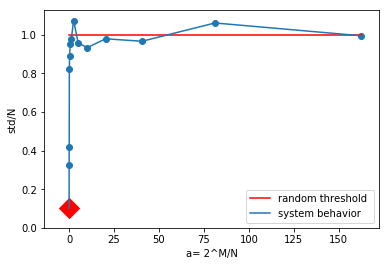

a_c =  0.019801980198019802


(array([1.98019802e-02, 3.96039604e-02, 7.92079208e-02, 1.58415842e-01,
        3.16831683e-01, 6.33663366e-01, 1.26732673e+00, 2.53465347e+00,
        5.06930693e+00, 1.01386139e+01, 2.02772277e+01, 4.05544554e+01,
        8.11089109e+01, 1.62217822e+02]),
 array([0.10195996, 0.32808405, 0.41845149, 0.8246055 , 0.88759692,
        0.95164752, 0.97906755, 1.0724418 , 0.95603256, 0.93224686,
        0.97824378, 0.96533157, 1.05989175, 0.99388515]))

In [4]:
sigmasN = np.asarray([s.get_Var_A() for s in simulations]) / N
alpha_list = np.asarray([2**M for M in MS]) / N 
plt.plot(alpha_list, [1 for _ in range(0, len(alpha_list))], 'r-')
plt.scatter(alpha_list, sigmasN)
plt.plot(alpha_list, sigmasN)
plt.scatter(x=np.argmin(min(sigmasN)), y=min(sigmasN), c='red', marker='D', s=200)
plt.xlabel("a= 2^M/N")
plt.ylabel("std/N")
plt.legend(["random threshold ", "system behavior"])
plt.show()  
a_c= min(alpha_list)
print("a_c = ", a_c)
alpha_list, sigmasN


##  Finally we experiment with  :
 - various agents number 
 - for sizes of history M 
 - with a prefixed set of strategies per agent and on which every agent will be choosing one at every iteration
 - with the meta-strategy (how who choose strategies)

In [ ]:
N = 11
S_num = range(2,6)
iterations_per_simulation=300
MS= range(1,12)

for S in S_num:
    simulations = []

    for M in MS:


        possible_history = ["".join(seq) for seq in itertools.product("01", repeat=M)]
        possible_historyDict=dict(enumerate(possible_history))
        possible_historyDict=dict(map(reversed, possible_historyDict.items()))
        simulations.append(
                MinorityGame(
                    N, 
                    M, 
                    S, 
                    possible_history, 
                    iterations_per_simulation
                )
        )
        showTime("simulation with M " + str(M))
            
    simulations = [s.get_Var_A() for s in simulations]
    sigmas = simulations
    sigmasN = np.asarray(sigmas)/ N
    aN = np.asarray([2**M for M in MS])/N

    plt.plot(aN, sigmasN)
    plt.scatter(aN, sigmasN)
    plt.legend(["S="+str(s) for s in S_num])
    plt.xlabel("a= 2^M/N")
    plt.ylabel("std/N")
plt.show()  

### # Conclusions
I  don't tust completely the results of my graphs. The A critical appears always the one with the lowest agent memory M=1. And for some reason for M = 1 ,2,3 I am always getting very low standard deviations.
That said the bigger values of M tend to converge to standar deiation 1.
Also there is always an uptrend and consequenctly a downtrend approaching the ideal relationship of the alpha and the standard deviation parameters.